In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# video folders structure
# original_video_data/yyyy_mm_dd/yyyy_mm_dd_hh_mm_ss_A.mp4
# for example original_video_data/2019_05_13/2019_05_13_11_19_31_B.mp4

In [2]:
from pathlib import Path
import os

import cv2
from IPython.display import clear_output, display

class video_metadata:
    def __init__(self, year, month, day, hour, minute, second, camera, file_extension):
        self.year = year
        self.month = month
        self.day = day
        self.hour = hour
        self.minute = minute
        self.second = second
        self.camera = camera
        self.file_extension = file_extension
    
    def __str__(self):
        return (f"{self.year}_{self.month}_{self.day}_{self.hour}_{self.minute}_{self.second}_{self.camera}.{self.file_extension}")

    def day_string(self):
        return (f"{self.year}_{self.month}_{self.day}")

    def time_string(self):
        return (f"{self.hour}_{self.minute}_{self.second}")

    def day_time_string(self):
        return (f"{self.year}_{self.month}_{self.day}_{self.hour}_{self.minute}_{self.second}")



class video_dataset:
    def __init__(self):
        self.dataset_folder_path = "./data/original_video_data/"
        self.video_frames_path = "./data/video_frames/"

    def get_all_videos_metadata(self):
        all_videos = []
        for day_folder in os.listdir(self.dataset_folder_path): # in day_folders
            for video in os.listdir(os.path.join(dataset_folder_path, day_folder)): # in videos
                video_name_split_period = video.split('.')
                video_name_split_underscore = video_name_split_period[0].split('_')

                year   = video_name_split_underscore[0]
                month  = video_name_split_underscore[1]
                day    = video_name_split_underscore[2]
                hour   = video_name_split_underscore[3]
                minute = video_name_split_underscore[4]
                second = video_name_split_underscore[5]
                camera = video_name_split_underscore[6]
                file_extension = video_name_split_period[1]

                single_video = video_metadata(year, month, day, hour, minute, second, camera, file_extension)
                all_videos.append(single_video)
                # print(f"Found video {year}-{month}-{day}-{hour}-{minute}-{second}-{camera}.{file_extension}")
        return all_videos

    def parse_all_videos_into_frames(self):
        all_videos_metadata = self.get_all_videos_metadata()
        # ensure video_frames folder exists
        Path(self.video_frames_path).mkdir(parents=True, exist_ok=True) # safe mkdir
        video_counter = 0
        for single_video_metadata in all_videos_metadata:
            video_counter = video_counter + 1
            print(f"Progress: {video_counter}/{len(all_videos_metadata)}")
            # check day folder exists
            # print(self.video_frames_path)
            video_day_path = os.path.join(self.video_frames_path, f"{single_video_metadata.day_string()}/")
            # print(video_day_path)
            Path(video_day_path).mkdir(parents=True, exist_ok=True) # safe mkdir
            # check time folder exists
            video_time_path = os.path.join(video_day_path, f"{single_video_metadata.time_string()}/")
            # print(video_time_path)
            Path(video_time_path).mkdir(parents=True, exist_ok=True) # safe mkdir
            # check camera folder exists
            video_camera_path = os.path.join(video_time_path, f"{single_video_metadata.camera}/")
            # print(video_camera_path)
            Path(video_camera_path).mkdir(parents=True, exist_ok=True) # safe mkdir

            frames_path = video_camera_path
            print(frames_path)

            files_in_frame_path = [f for f in os.listdir(frames_path) if os.path.isfile(os.path.join(frames_path, f))]
            if files_in_frame_path == []:
                print(f"Converting {single_video_metadata} to frames")
                cap_path = os.path.join(self.dataset_folder_path, f"{single_video_metadata.day_string()}/", f"{single_video_metadata}" )
                cap = cv2.VideoCapture(cap_path)
                print(f"Cappath is {cap_path}")
                count = 0
                frame_string = f"frame{count}.jpg"
                print(f"Writing to {os.path.join(frames_path, frame_string)}")
                while cap.isOpened():
                    #clear_output(wait=True)
                    # print(f"Frame {count}")
                    ret,frame = cap.read()
                    # cv2.imshow('window-name', frame)
                    cv2.imwrite(os.path.join(frames_path, f"frame{count}.jpg"), frame)
                    count = count + 1
                    if count > 599:
                        break
                cap.release()
                cv2.destroyAllWindows() # destroy all opened windows
            else:
                print(f"Video {single_video_metadata} was already converted")




# for md in ds.get_all_videos_metadata():
#     print(md)
# ds = video_dataset()
# ds.parse_all_videos_into_frames()

In [ ]:
# mk data_images folder
# mk subfolder for every folder in video data
# replicate data structure as date/time/A-B/allinfo_1-600.img

# get data for:
#    day -> list všech dní
#    day/video=1 -> jeden den
#    day/video=1/A -> jedna kamera
#    day/video=1/A/1-600 -> jeden obrázek

# načíst data jako názvy souborů a pak až load on demand

In [2]:
class rim_dataset:
    def __init__(self, days):
        self.days = days

class day_data:
    def __init__(self, ten_min_data, day):
        self.ten_min_data = ten_min_data
        self.day = day

class ten_min_data:
    def __init__(self, a, b, time):
        self.a = a
        self.b = b
        self.cameras = [a,b]
        self.time = time

class camera_data:
    def __init__(self, frames, camera_type):
        self.frames = frames
        self.camera_type = camera_type

class frame_data:
    def __init__(self, filename, path):
        self.filename = filename
        self.path = path
        self.number = int(filename.split('.')[0].split('e')[1])
        self.image = None

In [6]:
class data_loader:
    def __init__(self):
        self.video_frames_path = "../data/aframesa/"
        self.dataset = None

    def load_dataset(self):
        # iterate through days
        days = []
        for day_folder in os.listdir(self.video_frames_path):
            day_folder_path = os.path.join(self.video_frames_path, f"{day_folder}/")
            # iterate through times
            times = []
            for time_folder in os.listdir(day_folder_path): 
                time_folder_path = os.path.join(day_folder_path, f"{time_folder}/")
                # iterate through cameras
                cameras = []
                for camera_folder in os.listdir(time_folder_path): 
                    camera_folder_path = os.path.join(time_folder_path, f"{camera_folder}/")
                    # iterate through frames
                    frames = []
                    for frame_file in os.listdir(camera_folder_path): 
                        frame_file_path = os.path.join(camera_folder_path, f"{frame_file}")
                        frame = frame_data(frame_file, frame_file_path)
                        frames.append(frame)
                    camera = camera_data(frames, camera_folder)
                    cameras.append(camera)
                time = ten_min_data(cameras[0], cameras[1], time_folder)
                times.append(time)
            day = day_data(times, day_folder)
            days.append(day)
        self.dataset = rim_dataset(days)

# TODO: data should be probably saved as frame001 instead of frame1, because it may make mess for every 10 frames loaded

loader = data_loader()
loader.load_dataset()

In [7]:
loader.dataset.days[0].ten_min_data[0].a.frames[0].path

'../data/aframesa/2019_05_13/10_48_35/A/frame0.jpg'

In [9]:
import os


for a in range(0, len(loader.dataset.days[0].ten_min_data)):
    for b in range(0, len(loader.dataset.days[0].ten_min_data[0].cameras)):
        for c in range(0, len(loader.dataset.days[0].ten_min_data[0].cameras[0].frames)):
            old_path = loader.dataset.days[0].ten_min_data[a].cameras[b].frames[c].path # 1, 115
            number = str(int(old_path.split('/frame')[1].split('.jpg')[0])).zfill(3)
            new_path = old_path.split('/frame')[0] + '/frame' + number + '.jpg'
            os.rename(old_path, new_path)
            



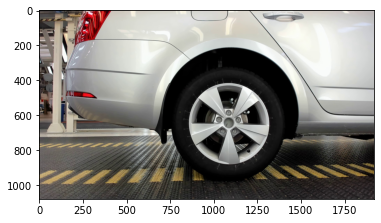

In [5]:
img = cv2.imread(loader.dataset.days[0].ten_min_data[0].a.frames[0].path)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [10]:
import numpy as np

# # Read image 
# img = cv2.imread(loader.dataset.days[0].ten_min_data[0].a.frames[0].path)
# # Convert the image to gray-scale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # Find the edges in the image using canny detector
# edges = cv2.Canny(gray, 50, 200)
# # Detect points that form a line
# lines = cv2.HoughLinesP(edges, 1, np.pi/180, max_slider, minLineLength=10, maxLineGap=250)
# # Draw lines on the image
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
# # Show result
# cv2.imshow("Result Image", img)

# RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(RGB_img)

# Read image as gray-scale
# img = cv2.imread('circles.png', cv2.IMREAD_COLOR)
# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
img_blur = cv2.medianBlur(gray, 5)
# Apply hough transform on the image
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=200, param2=10, minRadius=30, maxRadius=35)
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

plt.imshow(img)

In [7]:
import numpy as np

img = cv2.imread(loader.dataset.days[0].ten_min_data[0].a.frames[0].path)

plt.imshow("Result Image", img)

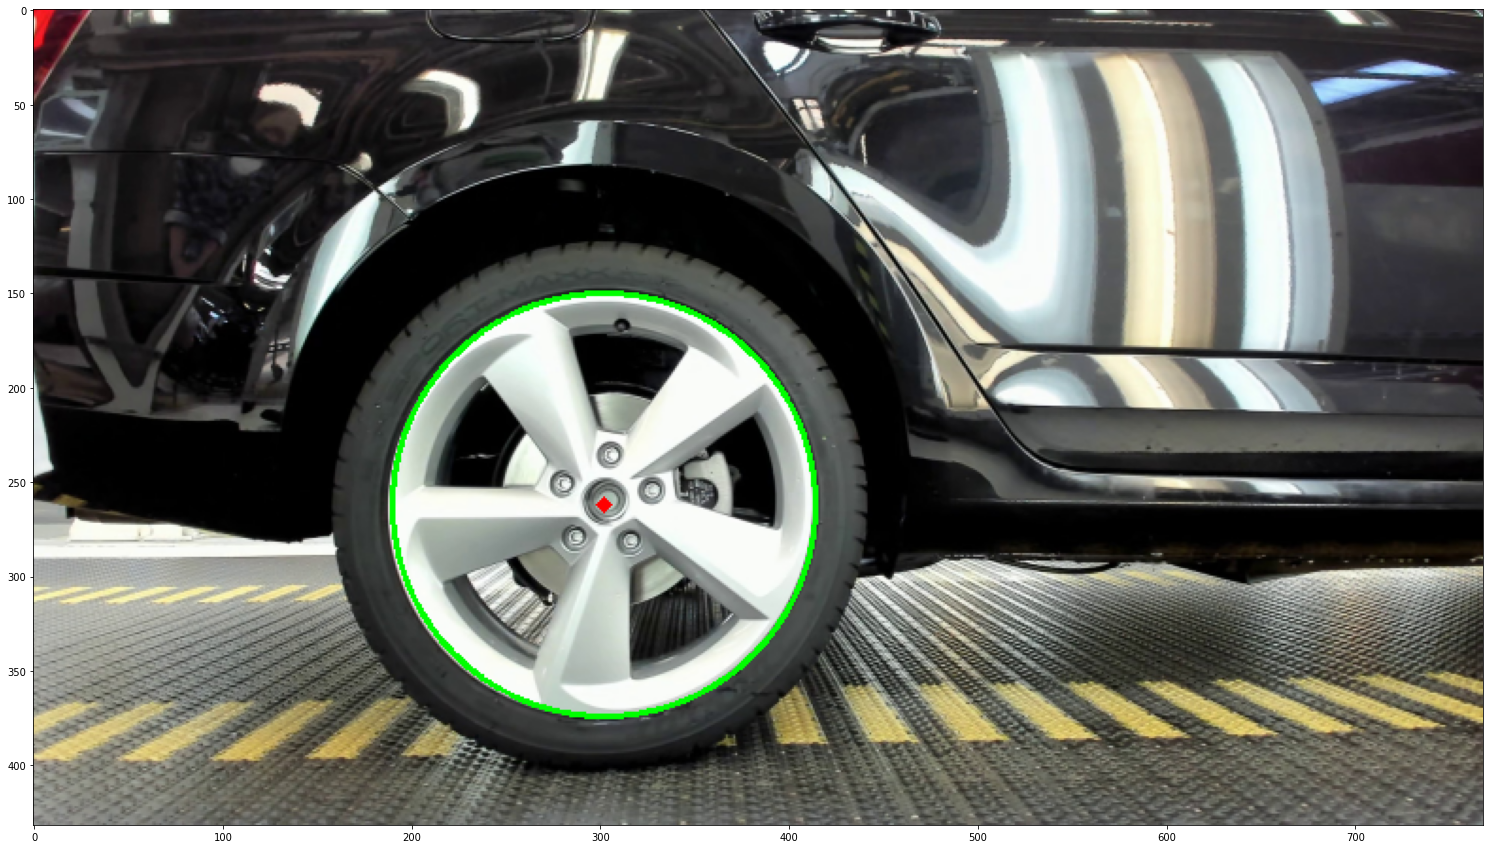

In [4]:
import numpy as np
import random

plt.rcParams['figure.figsize'] = [30, 15]

img = cv2.imread(loader.dataset.days[0].ten_min_data[0].a.frames[115].path) # 1, 115

scale_percent = 40.0 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

# Convert to gray-scale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
# Blur the image to reduce noise
# img_blur = cv2.medianBlur(gray, 5)
blur= cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)

canny = cv2.Canny(blur, 150, 250)
# Apply hough transform on the image
circles = cv2.HoughCircles(canny, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=50, param2=35, minRadius=int(200 * scale_percent/100), maxRadius=int(300 * scale_percent/100)) # 50, 35, 235, 300
# Draw detected circles
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(resized, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(resized, (i[0], i[1]), 2, (0, 0, 255), 3)

RGB_img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
# plt.imshow(gray, cmap=plt.cm.gray)
# plt.imshow(blur, cmap=plt.cm.gray)
# plt.imshow(canny, cmap=plt.cm.gray)
plt.imshow(RGB_img)


In [49]:
import numpy as np
import random

plt.rcParams['figure.figsize'] = [30, 15]


for a in range(56, len(loader.dataset.days[0].ten_min_data)):
    for b in range(0, len(loader.dataset.days[0].ten_min_data[0].cameras)):
        for c in range(0, len(loader.dataset.days[0].ten_min_data[0].cameras[0].frames)):
            img = cv2.imread(loader.dataset.days[0].ten_min_data[a].cameras[b].frames[c].path) # 1, 115

            scale_percent = 40.0 # percent of original size
            width = int(img.shape[1] * scale_percent / 100)
            height = int(img.shape[0] * scale_percent / 100)
            dim = (width, height)
            # resize image
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            final_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

            # Convert to gray-scale
            gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
            # Blur the image to reduce noise
            # img_blur = cv2.medianBlur(gray, 5)
            blur= cv2.GaussianBlur(gray, (5,5), cv2.BORDER_DEFAULT)

            canny = cv2.Canny(blur, 150, 250)
            # Apply hough transform on the image
            circles = cv2.HoughCircles(canny, cv2.HOUGH_GRADIENT, 1, img.shape[0]/64, param1=50, param2=35, minRadius=int(200 * scale_percent/100), maxRadius=int(300 * scale_percent/100)) # 50, 35, 235, 300
            # Draw detected circles
            if circles is not None:
                circles = np.uint16(np.around(circles))
                for i in circles[0, :]:
                    # Draw outer circle
                    cv2.circle(resized, (i[0], i[1]), i[2], (0, 255, 0), 2) # center coor, radius, color, thickness
                    # Draw inner circle
                    cv2.circle(resized, (i[0], i[1]), 2, (0, 0, 255), 3)

            RGB_img = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
            # plt.imshow(gray, cmap=plt.cm.gray)
            # plt.imshow(blur, cmap=plt.cm.gray)
            # plt.imshow(canny, cmap=plt.cm.gray)
            # plt.imshow(RGB_img)

            # cv2.imwrite(f"./data/3_extracted_rims/{str(k).zfill(3)}.jpg", resized) 

            if circles is not None:
                counter = 0
                for circle in circles[0, :]:
                    counter = counter + 1
                    print(img.shape)
                    print(circle)
                    rectangle_size = 280
                    rectangle_size_halved = int(rectangle_size/2)
                    crop_img = final_resized[max(circle[1] - rectangle_size_halved,0):circle[1]+rectangle_size_halved, max(circle[0]- rectangle_size_halved,0):circle[0]+rectangle_size_halved]
                    # crop_img = img[circle[1]:circle[1]+min(100, img.shape[0] - circle[1] -1), circle[0]:circle[0]+min(100, img.shape[1] - circle[0] -1)]
                    cv2.imwrite(f"./data/3_extracted_rims/{str(a).zfill(3)}_{str(b).zfill(3)}_{str(c).zfill(3)}_{str(counter).zfill(2)}.jpg", crop_img)

0, 3)
[678 114  87]
(1080, 1920, 3)
[654 134  86]
(1080, 1920, 3)
[672 134 105]
(1080, 1920, 3)
[624 118  94]
(1080, 1920, 3)
[616 140  81]
(1080, 1920, 3)
[576 118  94]
(1080, 1920, 3)
[562 130  91]
(1080, 1920, 3)
[522 122  96]
(1080, 1920, 3)
[512 140  82]
(1080, 1920, 3)
[472 126  97]
(1080, 1920, 3)
[422 128  96]
(1080, 1920, 3)
[372 128  96]
(1080, 1920, 3)
[384 140 106]
(1080, 1920, 3)
[326 128  95]
(1080, 1920, 3)
[328 148 111]
(1080, 1920, 3)
[276 128  94]
(1080, 1920, 3)
[290 142  82]
(1080, 1920, 3)
[226 128  93]
(1080, 1920, 3)
[244 136  82]
(1080, 1920, 3)
[224 146  82]
(1080, 1920, 3)
[210 134  83]
(1080, 1920, 3)
[176 126  94]
(1080, 1920, 3)
[172 144 100]
(1080, 1920, 3)
[194 136  83]
(1080, 1920, 3)
[132 136  92]
(1080, 1920, 3)
[122 120  85]
(1080, 1920, 3)
[112 140 109]
(1080, 1920, 3)
[ 76 140  97]
(1080, 1920, 3)
[ 94 142  87]
(1080, 1920, 3)
[ 74 124  83]
(1080, 1920, 3)
[ 30 136  96]
(1080, 1920, 3)
[196 134  86]
(1080, 1920, 3)
[740 122  94]
(1080, 1920, 3)
[694